## Get all the costs results :

In [98]:
import pandas as pd
#sourceCPLEX = "D:/DTU-Courses/DTU-Thesis/berth_allocation/MCBAP-multi-port-berth-allocation-problem/results_jobs/benchmarks_CPLEX/CPLEX_N4_N15_results_5min.csv"
sourceCPLEX = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_CPLEX/CPLEX_NLarge_results_2400s_all.csv"
sourceHeur = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_HEUR"
algo_folder="finalGRASP"
expnb=5
exp="GRASPonly5onecost"
Nmin=11
Nmax=15

def get_results_cost(type):
    dataCPLEX = pd.read_csv(sourceCPLEX)
    if type == 'large':
        dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/NLarge_concatenete.csv")
    else:
        for i in range(Nmin, Nmax):
            this_dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{i}_N{i}.csv")
            dataHeur = pd.concat([dataHeur, this_dataHeur], ignore_index=True)
    merged_df = pd.merge(dataCPLEX, dataHeur, how='inner', on=['Seed', 'N', 'Nout', 'qli'])
    merged_df["diff"] = (merged_df["HeurCost"] - merged_df["CPLEX"])/merged_df["CPLEX"]*100
    if type == 'large':
        merged_df.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/Large_diff_{exp}.csv", index=False)
    else:
        merged_df.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{Nmin}_N{Nmax}_diff{exp}.csv", index=False)
    return merged_df
merged_df = get_results_cost('large')


In [77]:
mean_diff = merged_df.groupby(['N', 'Nout'])['diff'].mean().reset_index()
mean_diff 

,N,Nout,diff
0,0,0,NaN
1,30,5,6.072642
2,30,10,8.996736
3,50,5,-2.077177
4,50,10,-1.951674


In [78]:
import pandas as pd
#sourceCPLEX = "D:/DTU-Courses/DTU-Thesis/berth_allocation/MCBAP-multi-port-berth-allocation-problem/results_jobs/benchmarks_CPLEX/CPLEX_N4_N15_results_5min.csv"
sourceCPLEX = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_CPLEX/CPLEX_NLarge_results_2400s_all.csv"
sourceHeur = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_HEUR"
algo_folder="finalGRASP"
expnb=5
exp="GRASPonly5"
Nmin=11
Nmax=15

def get_results_cost(type):
    dataCPLEX = pd.read_csv(sourceCPLEX)
    if type == 'large':
        dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/NLarge_concatenete.csv")
    else:
        for i in range(Nmin, Nmax):
            this_dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{i}_N{i}.csv")
            dataHeur = pd.concat([dataHeur, this_dataHeur], ignore_index=True)
    merged_df = pd.merge(dataCPLEX, dataHeur, how='inner', on=['Seed', 'N', 'Nout', 'qli'])
    merged_df["diff"] = (merged_df["HeurCost"] - merged_df["CPLEX"])/merged_df["CPLEX"]*100
    if type == 'large':
        merged_df.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/Large_diff_{exp}.csv", index=False)
    else:
        merged_df.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{Nmin}_N{Nmax}_diff{exp}.csv", index=False)
    return merged_df
merged_df = get_results_cost('large')


mean_diff = merged_df.groupby(['N', 'Nout'])['diff'].mean().reset_index()
mean_diff

,N,Nout,diff
0,0,0,NaN
1,30,5,7.086074
2,30,10,9.488708
3,50,5,-1.478442
4,50,10,-2.574500


## Get results in json :

In [80]:
from getdict_results import *

In [81]:
seed=2
Nin=30
qli=10
Nout=5

## Get vizualization from the sol 

In [82]:
file = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_CPLEX/sols_2400s/CPLEX_sol_{}_{}_{}_{}.csv".format(seed,Nin,Nout,qli)
results_sol = pd.read_csv(file)
listx=list(results_sol[results_sol['first']=='x']['second'])[0].replace(' ','').split('\n')

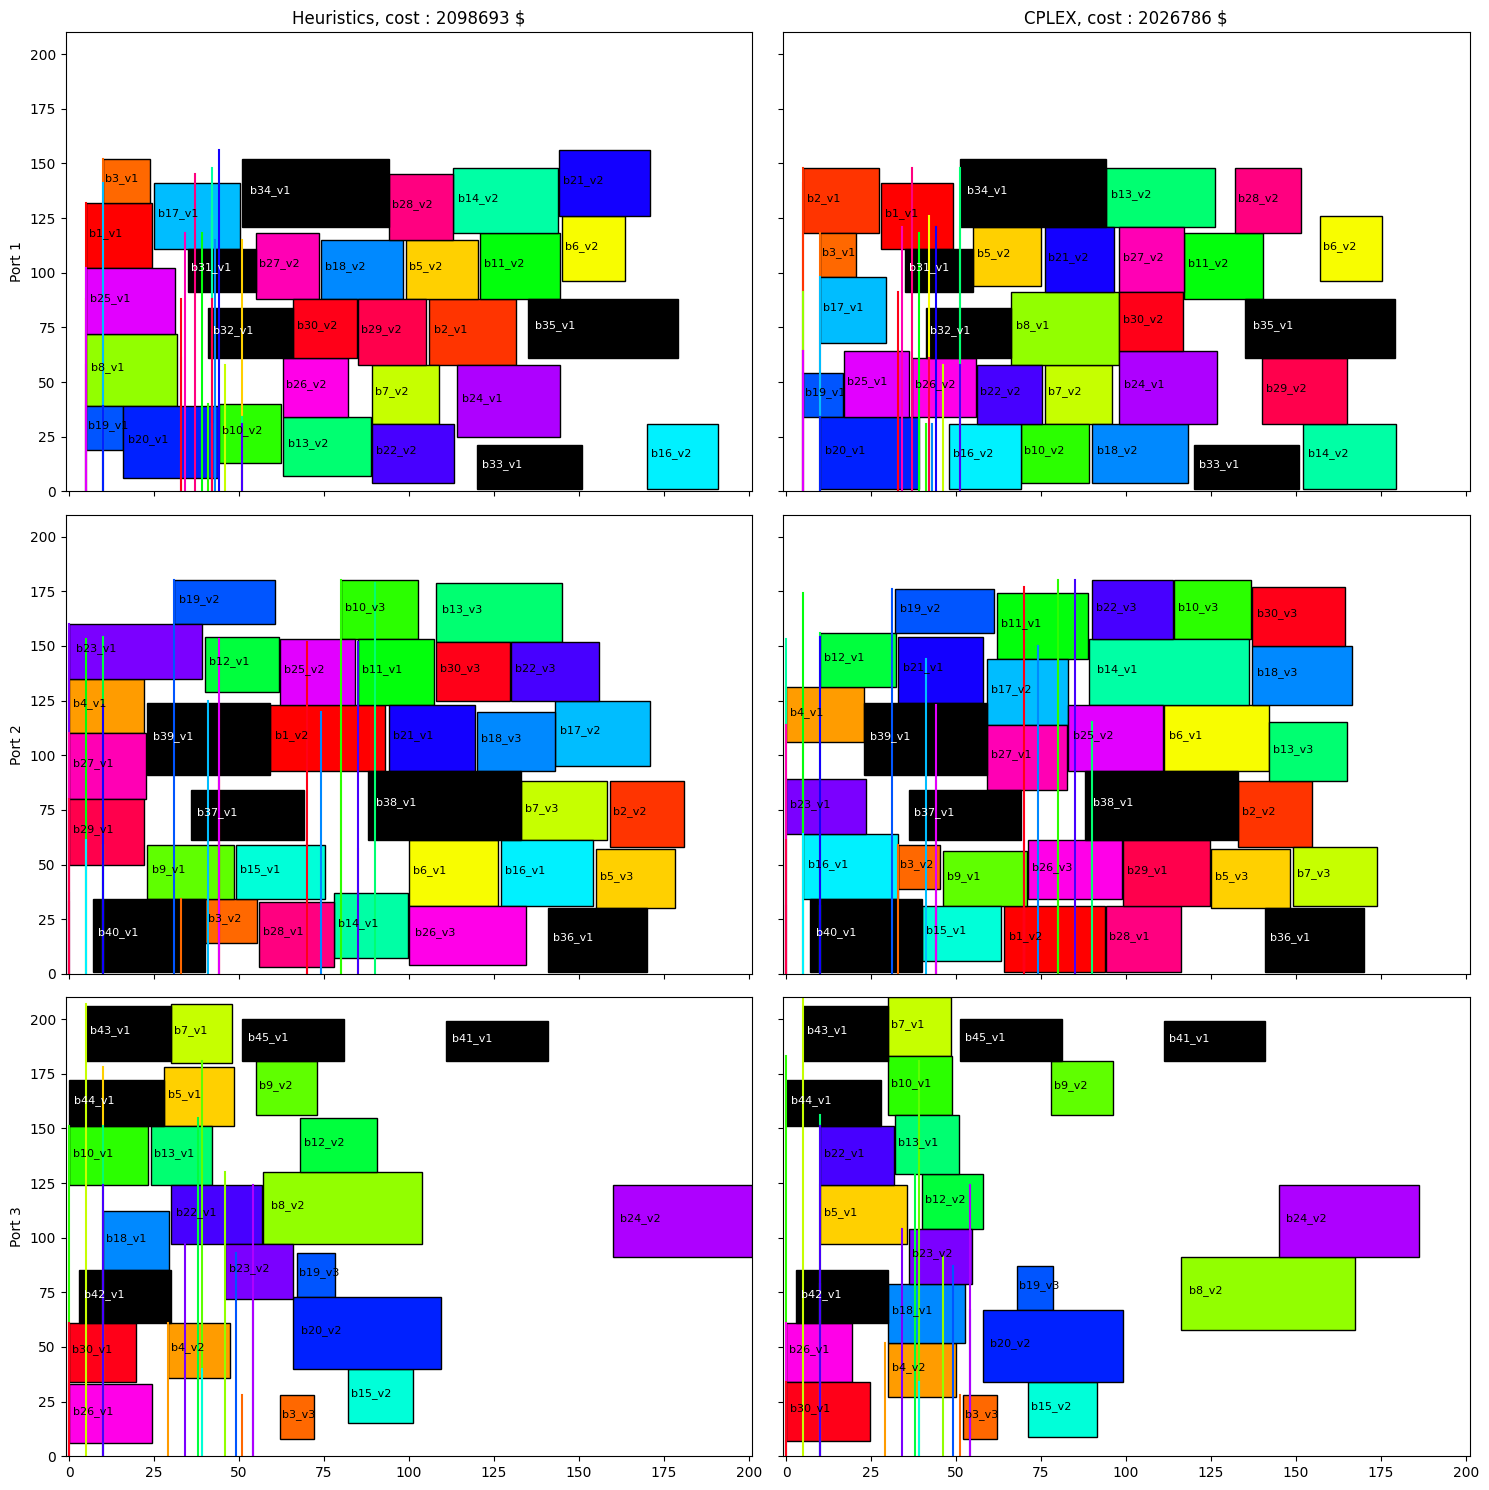

In [83]:
from make_graphs import *
getgraphs_port(algo_folder, exp, seed,Nin,Nout,qli, 'large', 5)

## Cost evolution :

In [99]:
dataset = make_datasetiterSoft(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
#for col in ['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit','n','c', 'when']:
#    dataset[col] = dataset[col].astype(int)

In [100]:
dataset.rename(columns={
    'objectif': 'Total Cost',
    'delay_cost_sollocal': 'Delay Cost',
    'penalty_sollocal': 'Penalty',
    'fuel_cost_sollocal': 'Fuel Cost',
    'handling_cost_sollocal': 'Handling Cost',
    'waiting_cost_sollocal': 'Waiting Cost'
}, inplace=True)

> Here we have the global breakdown cost over all the iterations for the instance chosen :

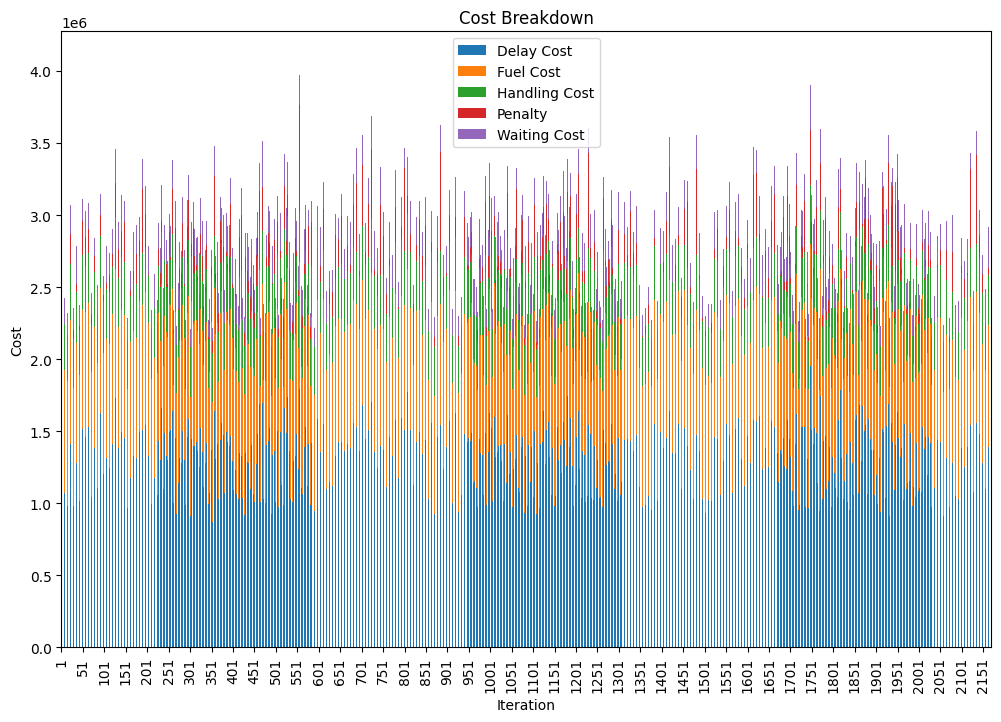

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# create dataset
dataset_subset = dataset[dataset['iter'] <= max(dataset['iter'])]
# create pivot table for solocal columns
df_pivot_solocal = pd.pivot_table(dataset_subset, values=['Delay Cost', 'Penalty', 'Fuel Cost', 'Handling Cost', 'Waiting Cost'], index=['iter'])


# create stacked bar plot for solocal columns
ax1 = df_pivot_solocal.plot(kind='bar', stacked=True, figsize=(12, 8))

# Specify the frequency of the tick labels
nth_label = 50
ticks = ax1.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax1.xaxis.get_ticklabels()]
ax1.xaxis.set_ticks(ticks[::nth_label])
ax1.xaxis.set_ticklabels(ticklabels[::nth_label])

# add labels and title for solocal columns
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.set_title('Cost Breakdown')

# show plots
plt.show()


In [87]:
len(dataset)

2169

### Cost when better :

In [28]:
dataset['better']

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
2985    0.0
2986    0.0
2987    0.0
2988    0.0
2989    0.0
Name: better, Length: 2990, dtype: float64

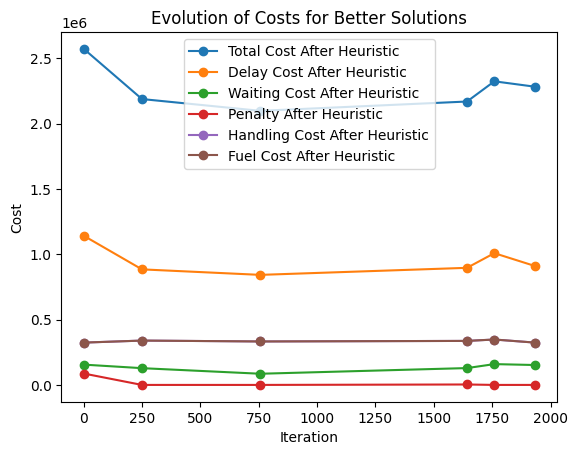

In [88]:
    import pandas as pd
    import matplotlib.pyplot as plt

    # Filtering the dataset where the 'better' column equals 1
    better_solutions = dataset[dataset['better'] == 1]

    # Extracting relevant columns for plotting
    iterations = better_solutions['iter']
    cost_solheur = better_solutions['Total Cost']
    delay_cost_solheur = better_solutions['Delay Cost']
    waiting_cost_solheur = better_solutions['Waiting Cost']
    penalty_solheur = better_solutions['Penalty']
    handling_cost_solheur = better_solutions['Handling Cost']
    fuel_cost_solheur = better_solutions['Handling Cost']

    # Plotting the lines
    plt.plot(iterations, cost_solheur, label='Total Cost After Heuristic', marker='o')
    plt.plot(iterations, delay_cost_solheur, label='Delay Cost After Heuristic', marker='o')
    plt.plot(iterations, waiting_cost_solheur, label='Waiting Cost After Heuristic', marker='o')
    plt.plot(iterations, penalty_solheur, label='Penalty After Heuristic', marker='o')
    plt.plot(iterations, handling_cost_solheur, label='Handling Cost After Heuristic', marker='o')
    plt.plot(iterations, fuel_cost_solheur, label='Fuel Cost After Heuristic', marker='o')

    # Adding titles and labels
    plt.title('Evolution of Costs for Better Solutions')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()

    # Show plot
    plt.show()



In [14]:
dataset[dataset['better'] == 1]

,iter,inst,Total Cost,chosen_tacticoneboat,chosen_reversed,chosen_tacticallboats,chosen_reversedtacticallboats,chosen_tacticlocalsearch,chosen_indexoneship,chosen_indexallship,...,oneboattime,allboatsdist,allboatstime,allboatscost,rateconstained,failed,better,reconstruct,pathrelinking,usedLocalSearch


### Cost comparison for multiple instance :

In [101]:
seed=2
Nin=30
qli=80
Nout=5
exp="GRASPonly4time001"
dataset2_30_10_5 = make_datasetiterSoft(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
dataset2_30_10_5['inst_type']="0.01"


In [102]:
dataset2_30_10_5["average_cost_elite"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
27757    0.0
27758    0.0
27759    0.0
27760    0.0
27761    0.0
Name: average_cost_elite, Length: 27762, dtype: object

In [103]:
seed=2
Nin=30
qli=80
Nout=5
exp="GRASPonly4time01"
dataset2_30_20_5 = make_datasetiterSoft(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
dataset2_30_20_5['inst_type']="0.1"

In [ ]:
seed=2
Nin=30
qli=80
Nout=5
exp="GRASPonly4time025"
dataset2_30_40_5 = make_datasetiterSoft(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
dataset2_30_40_5['inst_type']="0.2"

In [ ]:
seed=2
Nin=30
qli=80
Nout=5
exp="GRASPonly4time05"
dataset2_30_80_5 = make_datasetiterSoft(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
dataset2_30_80_5['inst_type']="0.4"

In [ ]:
dataset2_30_10_5['inst_type']="0.01"
dataset2_30_20_5['inst_type']="0.1"
dataset2_30_40_5['inst_type']="0.2"
dataset2_30_80_5['inst_type']="0.3"

0       3655721.707323
1       3852145.618824
2       3585269.364439
3       3116887.976842
4       2494428.772316
             ...      
2330    2494428.772316
2331    2494428.772316
2332    2494428.772316
2333    2494428.772316
2334    2494428.772316
Name: average_cost_elite, Length: 2335, dtype: object

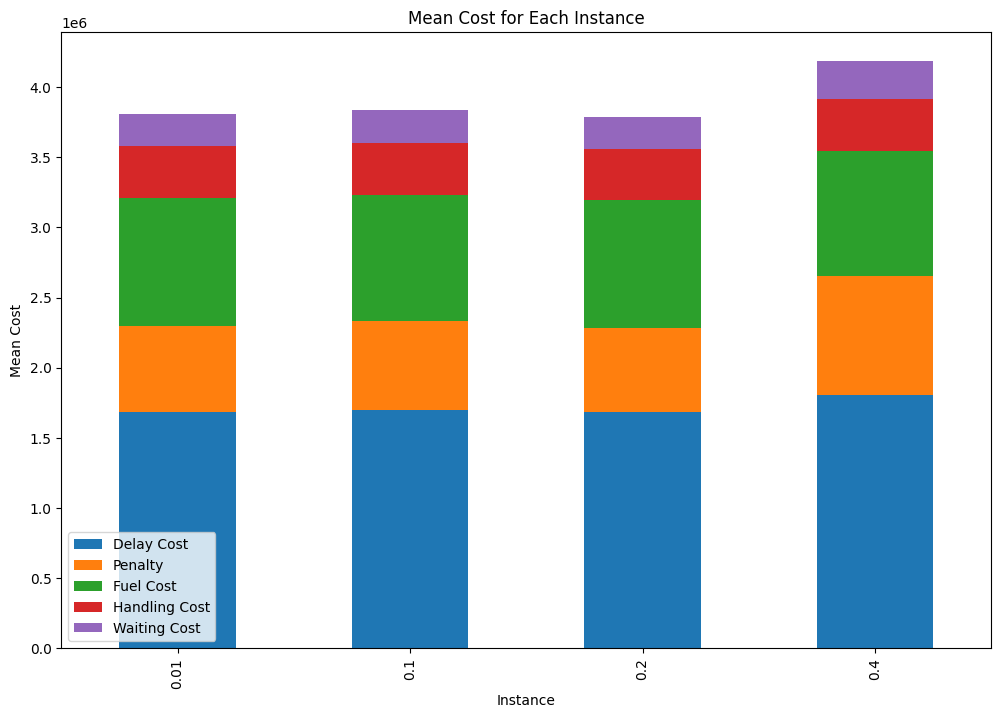

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Concatenate the datasets into a single DataFrame
all_datasets = pd.concat([ dataset2_30_10_5, dataset2_30_20_5, dataset2_30_40_5, dataset2_30_80_5])
all_datasets.rename(columns={
    'cost_sollocal': 'Total Cost',
    'delay_cost_sollocal': 'Delay Cost',
    'penalty_sollocal': 'Penalty',
    'fuel_cost_sollocal': 'Fuel Cost',
    'handling_cost_sollocal': 'Handling Cost',
    'waiting_cost_sollocal': 'Waiting Cost'
}, inplace=True)

all_datasets.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/alldatasets_comp_5.csv", index=False)

# Concatenate the datasets into a single DataFrame
#all_datasets = pd.concat([dataset2_30_10_10, dataset2_30_10_10, dataset2_30_20_10, dataset2_30_40_10, dataset2_30_80_10])
#all_datasets.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/alldatasets_comp_5.csv", index=False)

#all_datasets = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/alldatasets_comp.csv")


# Group by the 'inst' column and calculate the mean for each type of cost
mean_costs = all_datasets.groupby('inst_type').agg({
    'Delay Cost': 'mean',
    'Penalty': 'mean',
    'Fuel Cost': 'mean',
    'Handling Cost': 'mean',
    'Waiting Cost': 'mean'
}).reset_index()

# Plot the bar plot
mean_costs.plot(x='inst_type', kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Instance')
plt.ylabel('Mean Cost')
plt.title('Mean Cost for Each Instance')

# Show plot
plt.show()


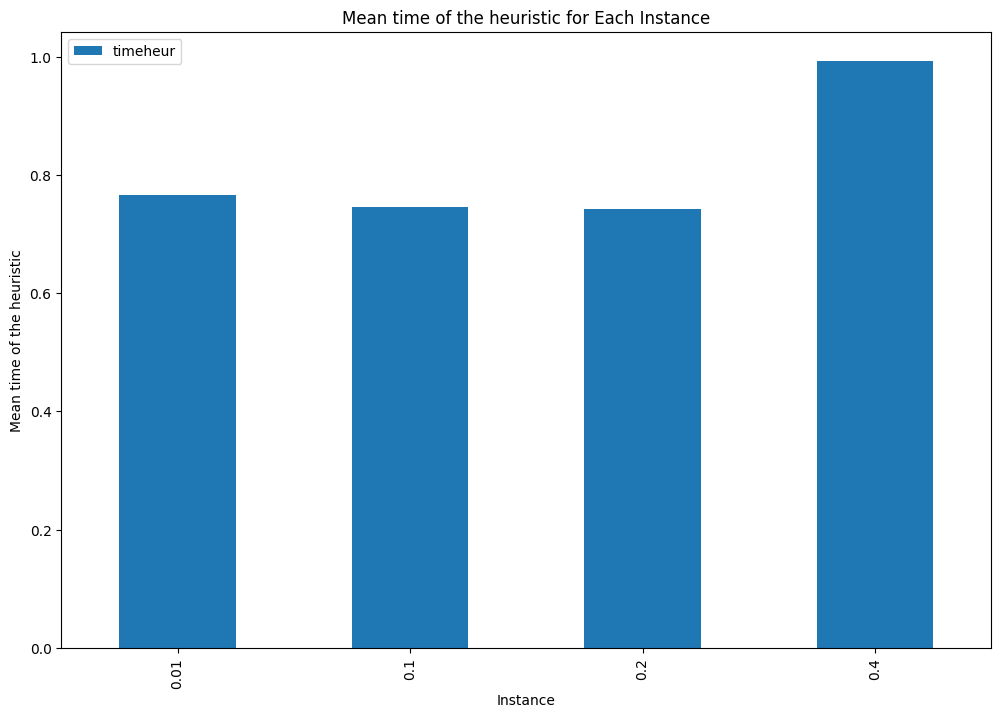

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Concatenate the datasets into a single DataFrame
all_datasets = pd.concat([dataset2_30_10_5, dataset2_30_20_5, dataset2_30_40_5, dataset2_30_80_5])
all_datasets.rename(columns={
    'cost_sollocal': 'Total Cost',
    'delay_cost_sollocal': 'Delay Cost',
    'penalty_sollocal': 'Penalty',
    'fuel_cost_sollocal': 'Fuel Cost',
    'handling_cost_sollocal': 'Handling Cost',
    'waiting_cost_sollocal': 'Waiting Cost'
}, inplace=True)

all_datasets.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/alldatasets_comp_5.csv", index=False)

# Concatenate the datasets into a single DataFrame
#all_datasets = pd.concat([dataset2_30_10_10, dataset2_30_10_10, dataset2_30_20_10, dataset2_30_40_10, dataset2_30_80_10])
#all_datasets.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/alldatasets_comp_5.csv", index=False)

#all_datasets = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/alldatasets_comp.csv")


# Group by the 'inst' column and calculate the mean for each type of cost
mean_costs = all_datasets.groupby('inst_type').agg({
    'timeheur': 'mean',
}).reset_index()

# Plot the bar plot
mean_costs.plot(x='inst_type', kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Instance')
plt.ylabel('Mean time of the heuristic')
plt.title('Mean time of the heuristic for Each Instance')

# Show plot
plt.show()


In [ ]:
dataset["chosen_indexallship"]

0      28    1
Name: second, dtype: object
1      28    4
Name: second, dtype: object
2      28    3
Name: second, dtype: object
3      28    1
Name: second, dtype: object
4      28    3
Name: second, dtype: object
                      ...                 
338    28    3
Name: second, dtype: object
339    28    3
Name: second, dtype: object
340    28    4
Name: second, dtype: object
341    28    3
Name: second, dtype: object
342    28    1
Name: second, dtype: object
Name: chosen_indexallship, Length: 343, dtype: object

## Parameters analysis

### Evolution of specific parameters :

In [ ]:
dataset.columns

Index(['iter', 'inst', 'Total Cost', 'chosen_tacticoneboat', 'chosen_reversed',
       'chosen_tacticallboats', 'chosen_reversedtacticallboats',
       'chosen_tacticlocalsearch', 'chosen_indexoneship',
       'chosen_indexallship', 'chosen_indexreversedallship',
       'chosen_indexrateconstrained', 'chosen_indexproptoremove',
       'cost_solheur', 'delay_cost_solheur', 'waiting_cost_solheur',
       'penalty_solheur', 'handling_cost_solheur', 'fuel_cost_solheur',
       'cost_sollocal', 'Delay Cost', 'Waiting Cost', 'Penalty',
       'Handling Cost', 'Fuel Cost', 'timeheur', 'timelocal',
       'proba_tacticboat', 'proba_tacticall', 'proba_tacticlocalsearch',
       'oneboatdistance', 'oneboatcost', 'oneboattime', 'allboatsdist',
       'allboatstime', 'allboatscost', 'rateconstained', 'failed', 'better',
       'reconstruct', 'pathrelinking', 'usedLocalSearch', 'average_cost_elite',
       'average_dist_elite', 'pushimprove'],
      dtype='object')

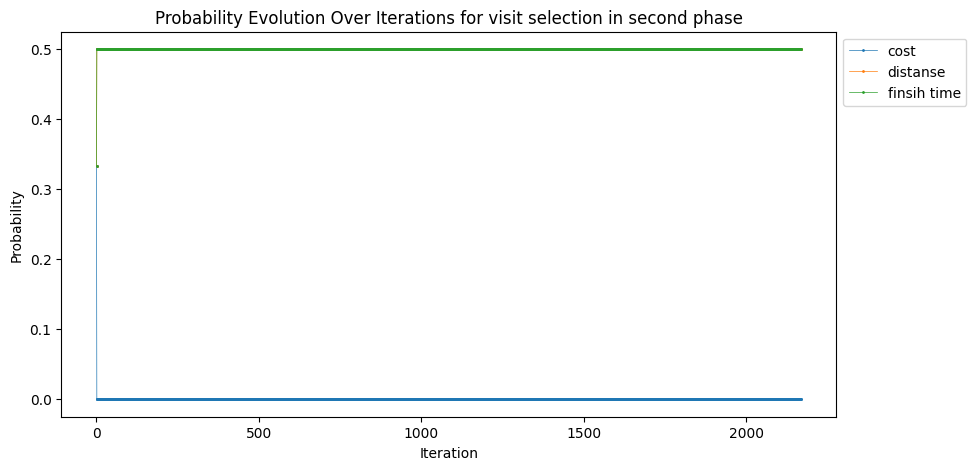

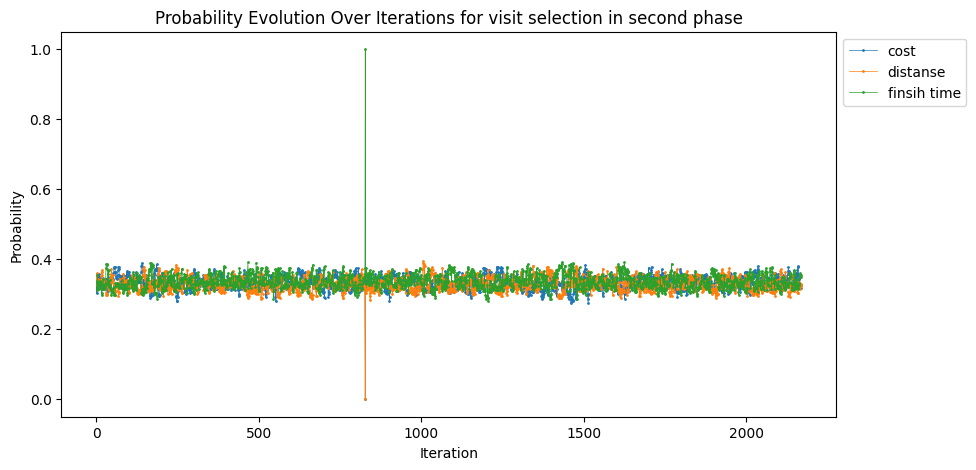

In [89]:
import matplotlib.pyplot as plt

# Group by 'iter' and extract the relevant columns
average_probabilities = dataset.groupby('iter').agg({
    'proba_tacticboat': 'first',
    'proba_tacticall': 'first'
}).reset_index()

# Extract the relevant columns for plotting
iterations = average_probabilities['iter']
proba_boat = average_probabilities['proba_tacticboat']
proba_all = average_probabilities['proba_tacticall']

element_names=['cost','distanse','finsih time']
# List of columns to plot
columns_to_plot = ['proba_tacticboat', 'proba_tacticall']
# Loop through the columns
for column_name, probabilities in zip(columns_to_plot, [proba_boat, proba_all]):
    
    # Determine the number of elements in the lists
    num_elements = len(probabilities.iloc[0])
    
    # Create a new figure for each column
    plt.figure(figsize=(10, 5))
    
    # Loop through each element in the lists
    for element_idx in range(num_elements):
        
        # Extract the probability element across all iterations
        element_probabilities = [prob_list[element_idx] for prob_list in probabilities]
        
        # Plot the probability evolution of each element in the list
        plt.plot(iterations, element_probabilities, marker='o', markersize=1, linewidth=0.5, label=f'{element_names[element_idx]}')
    
    # Adding titles and labels
    plt.title(f'Probability Evolution Over Iterations for visit selection in second phase')
    plt.xlabel('Iteration')
    plt.ylabel('Probability')
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))

    # Show plot
    plt.show()


### Which cost for which parameter :

In [22]:
dataset["chosen_tacticoneboat"][dataset["chosen_tacticoneboat"] == 'dist']

1       dist
2       dist
6       dist
8       dist
10      dist
        ... 
3789    dist
3792    dist
3795    dist
3804    dist
3806    dist
Name: chosen_tacticoneboat, Length: 954, dtype: object

In [93]:
dataset["chosen_tacticallboats"]

0       dist
1       time
2       time
3       time
4       time
        ... 
2164    dist
2165    cost
2166    cost
2167    cost
2168    dist
Name: chosen_tacticallboats, Length: 2169, dtype: object

0       cost
1       cost
2       cost
3       cost
4       cost
        ... 
2164    cost
2165    cost
2166    cost
2167    cost
2168    cost
Name: chosen_tacticoneboat, Length: 2169, dtype: object


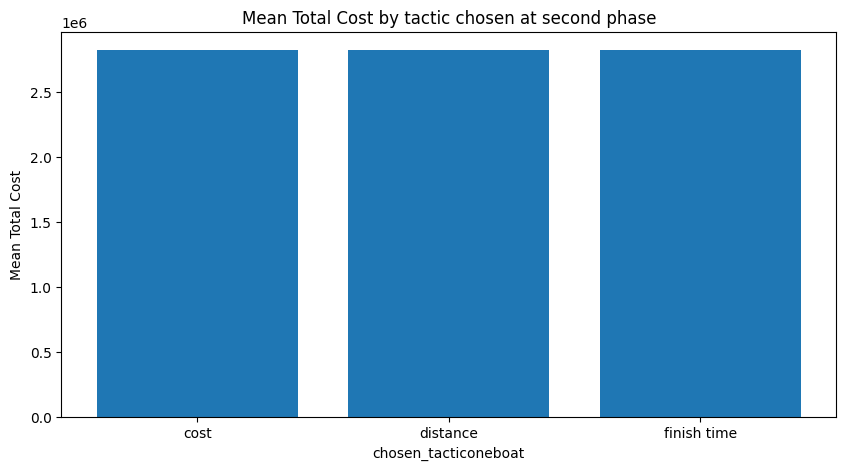

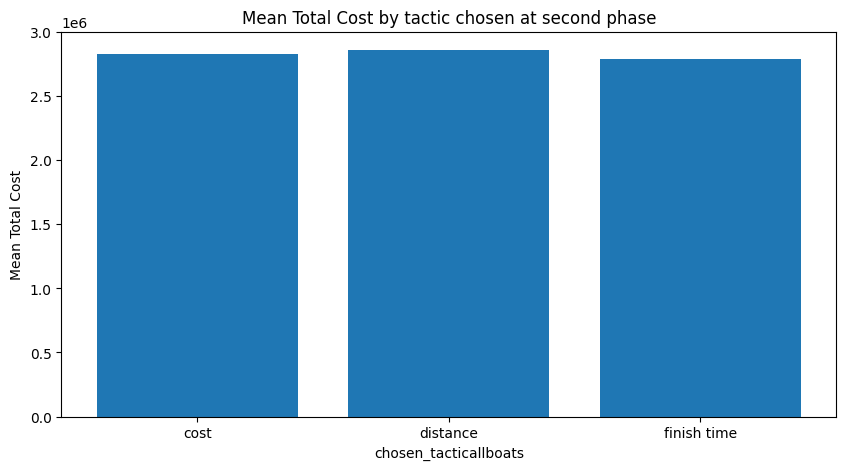

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of the columns for which bar plots are needed
columns_to_plot = [
    "chosen_tacticoneboat",
    "chosen_tacticallboats",
]

# Loop through each column name to extract the value from the series
for column_name in columns_to_plot:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))
print(dataset['chosen_tacticoneboat'])
# Loop through each column name to create the bar plots
for column_name in columns_to_plot:
    # Group by the column name and calculate the mean total cost for each unique value
    mean_total_costs = dataset.groupby(column_name).agg({'Total Cost': 'mean'}).reset_index()

    # Plot the bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(['cost', 'distance', 'finish time'], mean_total_costs['Total Cost'])
    
    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Mean Total Cost')
    plt.title(f'Mean Total Cost by tactic chosen at second phase')
    
    # Show plot
    plt.show()


> Should we reversed ? Looks like a great tactic somehow

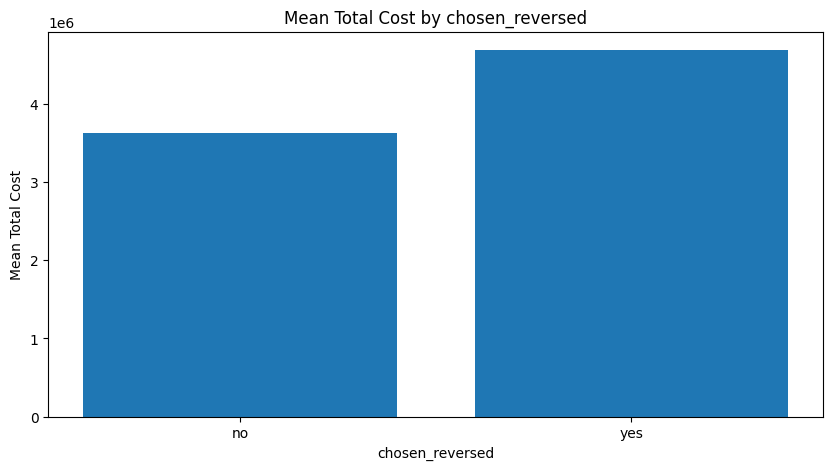

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of the columns for which bar plots are needed
columns_to_plot = [
    'chosen_reversed',
]

# Loop through each column name to extract the value from the series
for column_name in columns_to_plot:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))

# Loop through each column name to create the bar plots
for column_name in columns_to_plot:
    # Group by the column name and calculate the mean total cost for each unique value
    mean_total_costs = dataset.groupby(column_name).agg({'Total Cost': 'mean'}).reset_index()

    # Plot the bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(mean_total_costs[column_name], mean_total_costs['Total Cost'])
    
    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Mean Total Cost')
    plt.title(f'Mean Total Cost by {column_name}')
    
    # Show plot
    plt.show()


### Index evolution with one type of tactic

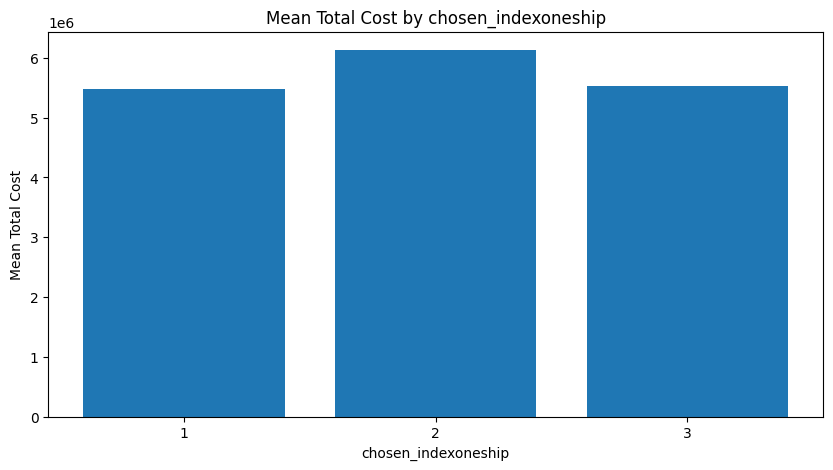

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of the columns for which bar plots are needed
columns_to_plot = [
    "chosen_indexoneship",
]

# Loop through each column name to extract the value from the series
for column_name in columns_to_plot:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))

# Loop through each column name to create the bar plots
for column_name in columns_to_plot:
    # Group by the column name and calculate the mean total cost for each unique value
    mean_total_costs = dataset[dataset["chosen_tacticoneboat"]=='dist'].groupby(column_name).agg({'Total Cost': 'mean'}).reset_index()

    # Plot the bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(mean_total_costs[column_name], mean_total_costs['Total Cost'])
    
    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Mean Total Cost')
    plt.title(f'Mean Total Cost by {column_name}')
    
    # Show plot
    plt.show()


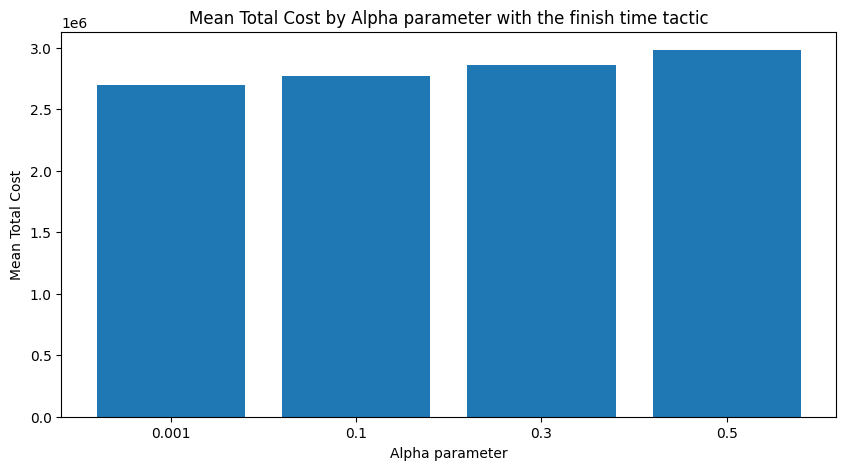

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of the columns for which bar plots are needed
columns_to_plot = [
    "chosen_indexallship",
]

# Loop through each column name to extract the value from the series
for column_name in columns_to_plot:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))

# Loop through each column name to create the bar plots
for column_name in columns_to_plot:
    # Group by the column name and calculate the mean total cost for each unique value
    mean_total_costs = dataset[dataset["chosen_tacticallboats"]=='cost'].groupby(column_name).agg({'Total Cost': 'mean'}).reset_index()

    # Plot the bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(['0.001', '0.1', '0.3', '0.5'], mean_total_costs['Total Cost'])
    
    # Add labels and title
    plt.xlabel("Alpha parameter")
    plt.ylabel('Mean Total Cost')
    plt.title(f'Mean Total Cost by Alpha parameter with the finish time tactic')
    
    # Show plot
    plt.show()


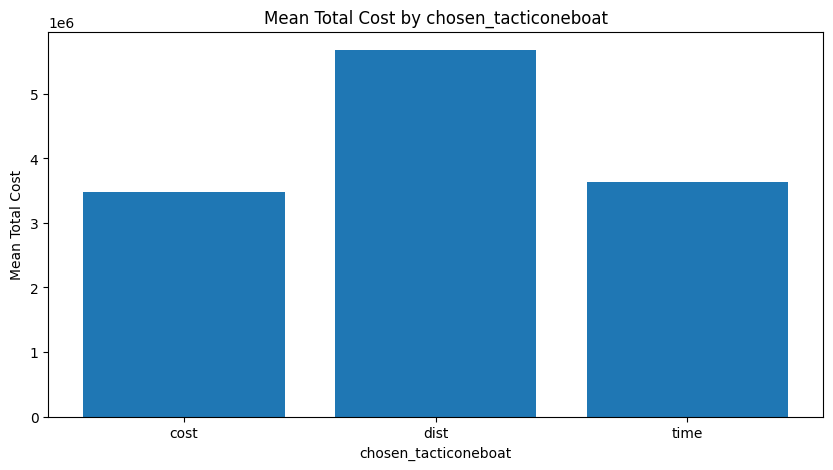

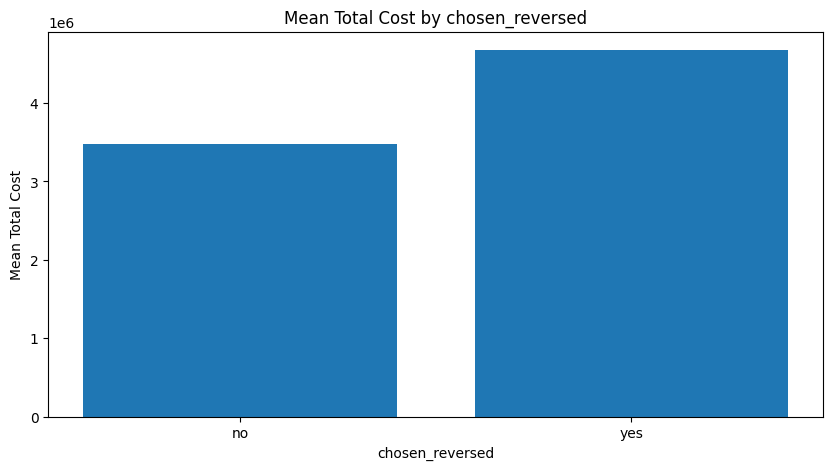

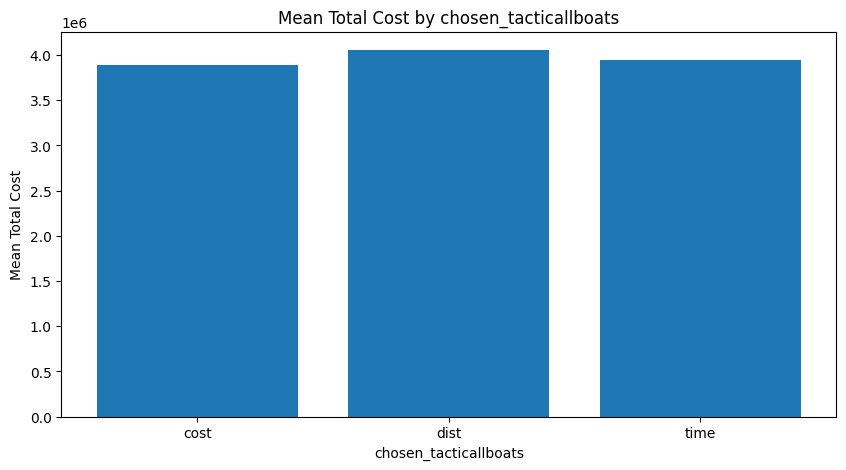

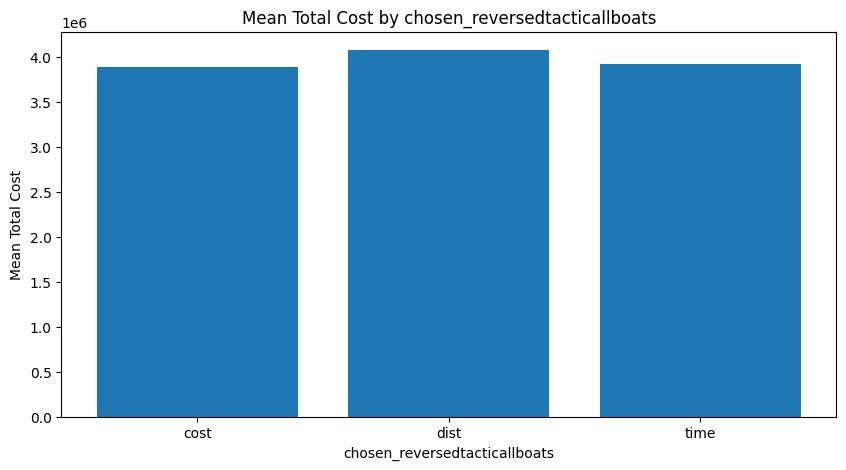

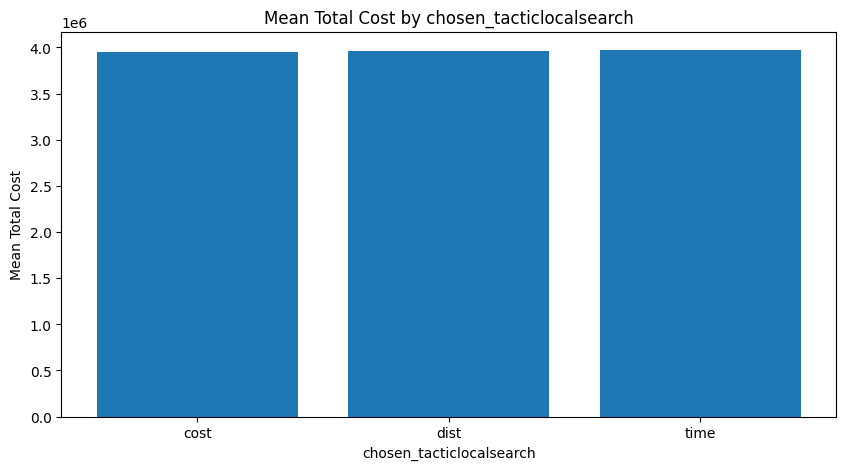

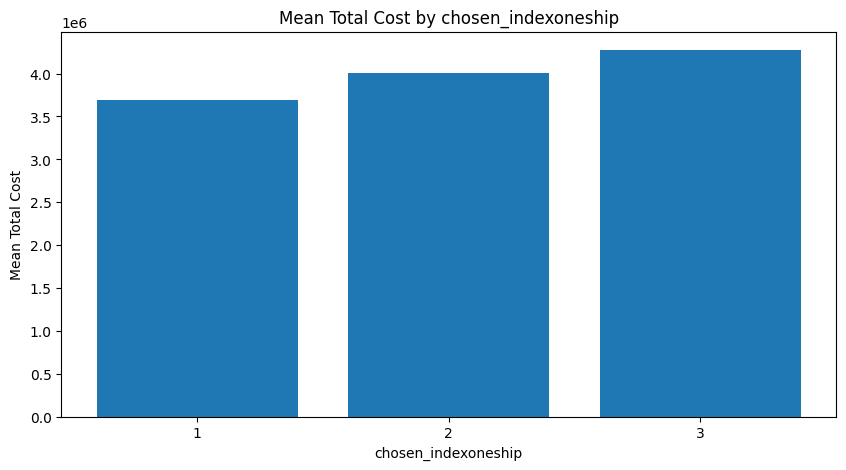

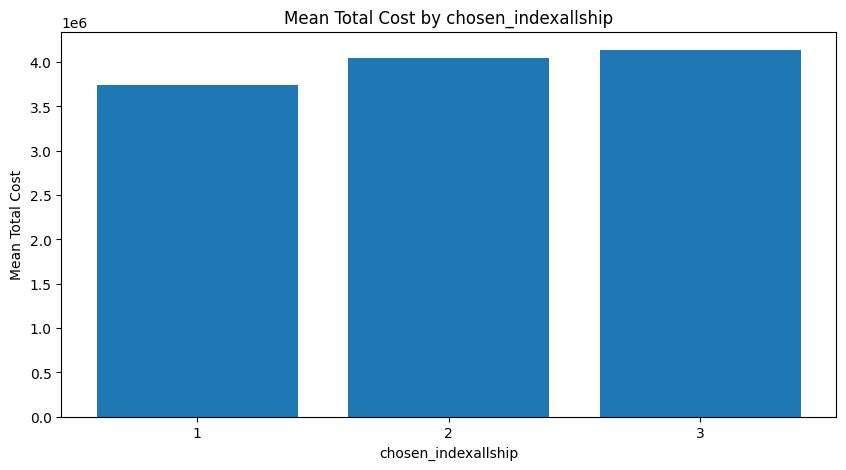

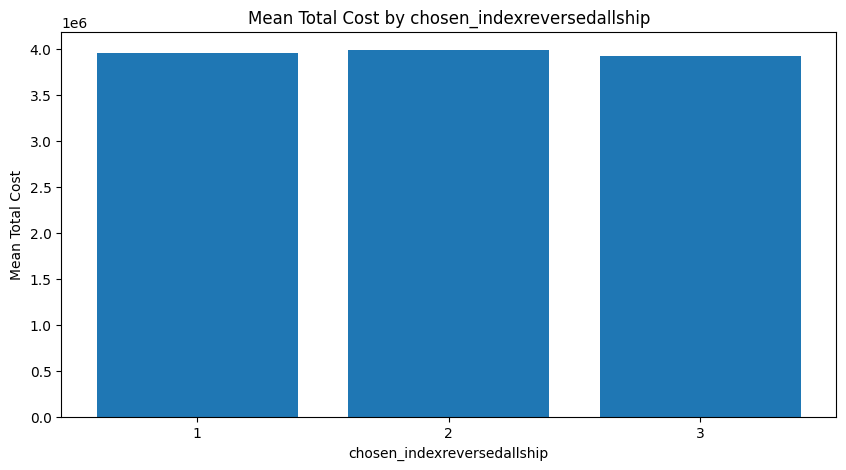

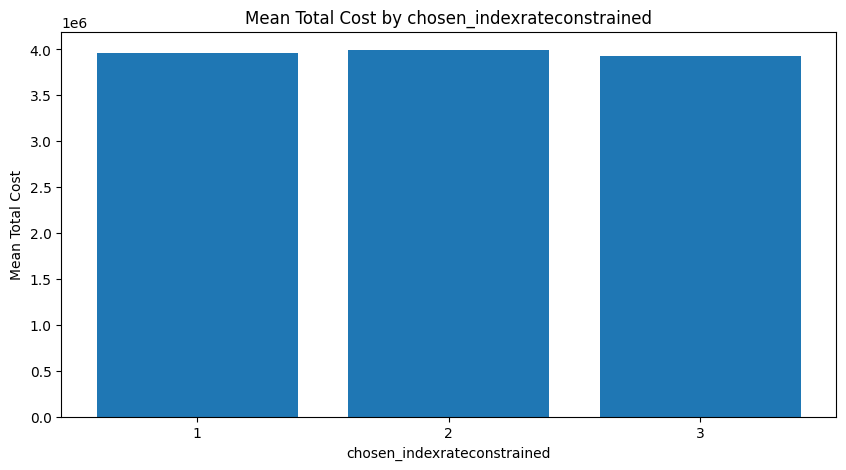

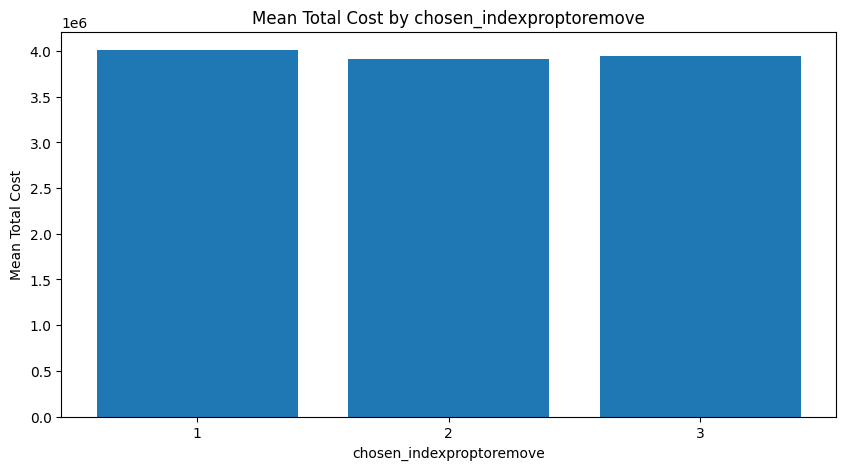

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of the columns for which bar plots are needed
columns_to_plot = [
    "chosen_tacticoneboat",
    "chosen_reversed",
    "chosen_tacticallboats",
    "chosen_reversedtacticallboats",
    "chosen_tacticlocalsearch",
    "chosen_indexoneship",
    "chosen_indexallship",
    "chosen_indexreversedallship",
    "chosen_indexrateconstrained",
    "chosen_indexproptoremove"
]

# Loop through each column name to extract the value from the series
for column_name in columns_to_plot:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))

# Loop through each column name to create the bar plots
for column_name in columns_to_plot:
    # Group by the column name and calculate the mean total cost for each unique value
    mean_total_costs = dataset.groupby(column_name).agg({'Total Cost': 'mean'}).reset_index()

    # Plot the bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(mean_total_costs[column_name], mean_total_costs['Total Cost'])
    
    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Mean Total Cost')
    plt.title(f'Mean Total Cost by {column_name}')
    
    # Show plot
    plt.show()


In [ ]:
dataset.column

Index(['iter', 'inst', 'Total Cost', 'chosen_tacticoneboat', 'chosen_reversed',
       'chosen_tacticallboats', 'chosen_reversedtacticallboats',
       'chosen_tacticlocalsearch', 'chosen_indexoneship',
       'chosen_indexallship', 'chosen_indexreversedallship',
       'chosen_indexrateconstrained', 'chosen_indexproptoremove',
       'cost_solheur', 'delay_cost_solheur', 'waiting_cost_solheur',
       'penalty_solheur', 'handling_cost_solheur', 'fuel_cost_solheur',
       'cost_sollocal', 'Delay Cost', 'Waiting Cost', 'Penalty',
       'Handling Cost', 'Fuel Cost', 'timeheur', 'timelocal',
       'proba_tacticboat', 'proba_tacticall', 'proba_tacticlocalsearch',
       'oneboatdistance', 'oneboatcost', 'oneboattime', 'allboatsdist',
       'allboatstime', 'allboatscost', 'rateconstained', 'failed', 'better',
       'reconstruct', 'pathrelinking', 'usedLocalSearch', 'average_cost_elite',
       'average_dist_elite', 'pushimprove'],
      dtype='object')

### Statistical analysis with machine learning : decision tree :

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

# Select the columns you are interested in
features = [
    "chosen_tacticoneboat",
    #"chosen_reversed",
    "chosen_tacticallboats",
    "chosen_reversedtacticallboats",
    #"chosen_tacticlocalsearch",
    "chosen_indexoneship",
    "chosen_indexallship",
    #"chosen_indexreversedallship",
    "chosen_indexrateconstrained",
    #"chosen_indexproptoremove"
]

for column_name in features:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))
# Prepare the feature matrix X and target y
X = dataset[features].copy()
y = dataset['Total Cost']

# Initialize a label encoder
le = LabelEncoder()

# Loop over each column and apply the label encoding
for col in X.columns:
    X[col] = le.fit_transform(X[col])

# Initialize and fit the decision tree
model = DecisionTreeRegressor()
model.fit(X, y)

# Print the feature importance
importance_dict = dict(zip(features, model.feature_importances_))
print(importance_dict)


{'chosen_tacticoneboat': 0.5018774069148341, 'chosen_tacticallboats': 0.06809340393997965, 'chosen_reversedtacticallboats': 0.11667972047471994, 'chosen_indexoneship': 0.16115015729095875, 'chosen_indexallship': 0.08536538016198607, 'chosen_indexrateconstrained': 0.0668339312175214}


## Diversity analysis :

In [20]:
all_datasets = all_datasets[all_datasets['average_cost_elite']!='None']

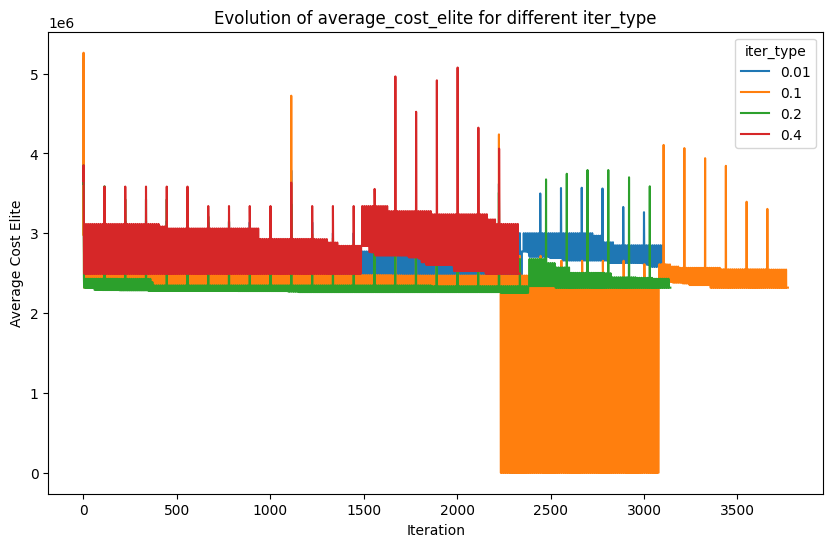

In [21]:
import matplotlib.pyplot as plt

# Get the unique iter_type values
iter_types = all_datasets['inst_type'].unique()

# Create a figure
plt.figure(figsize=(10, 6))

# Plot a line for each iter_type
for iter_type in iter_types:
    subset = all_datasets[all_datasets['inst_type'] == iter_type]
    plt.plot(subset['iter'], subset['average_cost_elite'], label=iter_type)

plt.title('Evolution of average_cost_elite for different iter_type')
plt.xlabel('Iteration')
plt.ylabel('Average Cost Elite')
plt.legend(title='iter_type')  # Add a legend

plt.show()


C:\Users\kerve\AppData\Local\Temp\ipykernel_31968\3414974084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_datasets_plot['average_dist_elite'] = pd.to_numeric(all_datasets_plot['average_dist_elite'], errors='coerce')


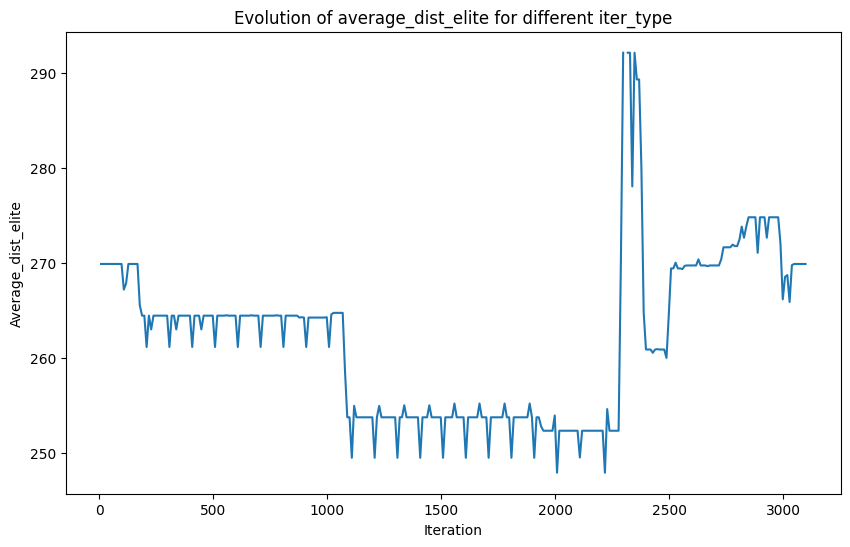

In [54]:
all_datasets_plot = all_datasets[(all_datasets['inst_type']=='0.01') & (all_datasets['average_dist_elite']<1000) & (all_datasets['average_dist_elite']>0)]

# Convert 'average_dist_elite' to numeric, coercing non-numeric values to NaN
all_datasets_plot['average_dist_elite'] = pd.to_numeric(all_datasets_plot['average_dist_elite'], errors='coerce')

# Drop rows where 'average_dist_elite' is NaN
all_datasets_plot = all_datasets_plot.dropna(subset=['average_dist_elite'])

# Define bins of size 10 from the minimum 'iter' to the maximum 'iter'
bins = np.arange(all_datasets_plot['iter'].min(), all_datasets_plot['iter'].max(), 10)
all_datasets_plot['iter_bins'] = pd.cut(all_datasets_plot['iter'], bins)

# Group by bins and calculate the average for 'average_dist_elite'
averaged_dataset = all_datasets_plot.groupby('iter_bins')['average_dist_elite'].mean().reset_index()

# Create a figure
plt.figure(figsize=(10, 6))
plt.plot(averaged_dataset['iter_bins'].apply(lambda x: x.mid), averaged_dataset['average_dist_elite'])
plt.title('Evolution of average_dist_elite for different iter_type')
plt.xlabel('Iteration')
plt.ylabel('Average_dist_elite')

plt.show()





C:\Users\kerve\AppData\Local\Temp\ipykernel_31968\319491579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_datasets_plot['average_cost_elite'] = pd.to_numeric(all_datasets_plot['average_cost_elite'], errors='coerce')


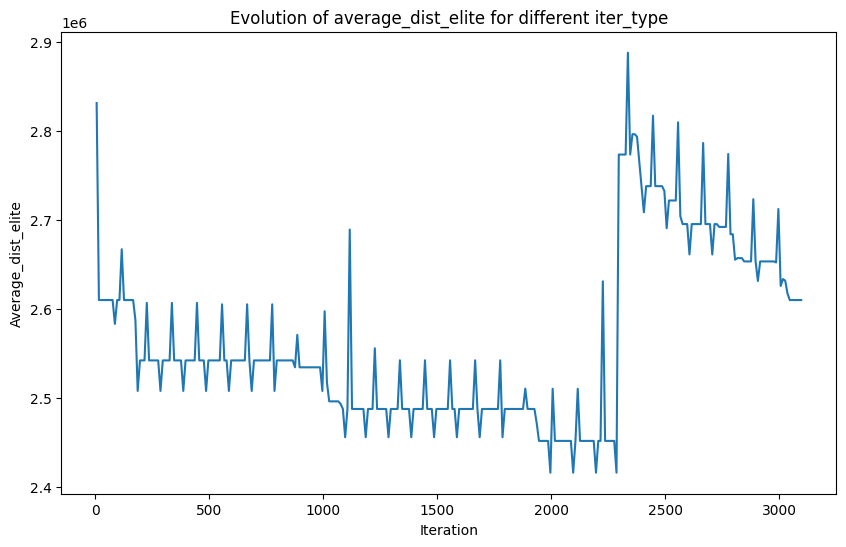

In [55]:
all_datasets_plot = all_datasets[(all_datasets['inst_type']=='0.01') & (all_datasets['average_cost_elite']>0)]

# Convert 'average_dist_elite' to numeric, coercing non-numeric values to NaN
all_datasets_plot['average_cost_elite'] = pd.to_numeric(all_datasets_plot['average_cost_elite'], errors='coerce')

# Drop rows where 'average_dist_elite' is NaN
all_datasets_plot = all_datasets_plot.dropna(subset=['average_cost_elite'])

# Define bins of size 10 from the minimum 'iter' to the maximum 'iter'
bins = np.arange(all_datasets_plot['iter'].min(), all_datasets_plot['iter'].max(), 10)
all_datasets_plot['iter_bins'] = pd.cut(all_datasets_plot['iter'], bins)

# Group by bins and calculate the average for 'average_dist_elite'
averaged_dataset = all_datasets_plot.groupby('iter_bins')['average_cost_elite'].mean().reset_index()

# Create a figure
plt.figure(figsize=(10, 6))
plt.plot(averaged_dataset['iter_bins'].apply(lambda x: x.mid), averaged_dataset['average_cost_elite'])
plt.title('Evolution of average_dist_elite for different iter_type')
plt.xlabel('Iteration')
plt.ylabel('Average_dist_elite')

plt.show()





In [74]:
old_cost=100000000000000000
iterations = list(all_datasets_plot['iter'].unique())
for i in iterations:
    new_cost=all_datasets_plot['average_cost_elite'][all_datasets_plot['iter']==i].mean()
    if new_cost>old_cost:
        print(i)
    old_cost=new_cost

15
26
37
48
59
70
81
92
103
114
126
137
148
159
170
181
192
203
214
225
237
248
259
270
281
292
303
314
325
336
348
359
370
381
392
403
414
425
436
447
459
470
481
492
503
514
525
536
547
558
570
581
592
603
614
625
636
647
658
669
681
692
703
714
725
736
747
758
769
780
792
803
814
825
836
847
858
869
880
891
903
914
925
936
947
958
969
980
991
1002
1014
1019
1025
1036
1047
1058
1069
1079
1080
1091
1102
1113
1126
1137
1148
1159
1170
1181
1192
1203
1214
1225
1237
1248
1259
1270
1281
1292
1303
1314
1325
1336
1348
1359
1370
1381
1392
1403
1414
1425
1436
1447
1459
1470
1481
1492
1503
1514
1525
1536
1547
1558
1570
1581
1592
1603
1614
1625
1636
1647
1658
1669
1681
1692
1703
1714
1725
1736
1747
1758
1769
1780
1792
1803
1814
1825
1836
1847
1858
1869
1880
1891
1903
1914
1925
1936
1947
1958
1969
1980
1991
2002
2014
2025
2036
2047
2058
2069
2080
2091
2102
2113
2125
2136
2147
2158
2169
2180
2191
2202
2213
2224
2237
2248
2259
2270
2281
2292
2336
2357
2368
2379
2390
2401
2412
2423
2434
2445
2457
24

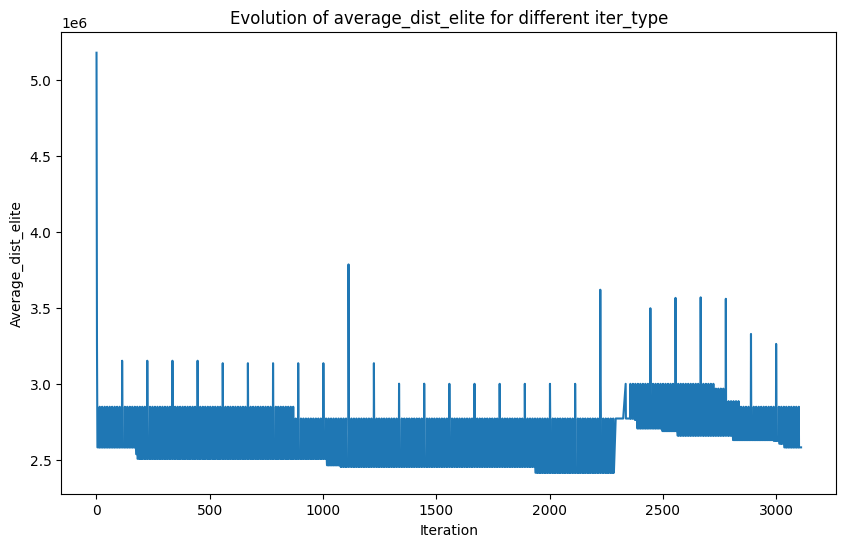

In [73]:
# Create a figure
plt.figure(figsize=(10, 6))
plt.plot(list(all_datasets_plot['iter'].unique()), all_datasets_plot['average_cost_elite'])
plt.title('Evolution of average_dist_elite for different iter_type')
plt.xlabel('Iteration')
plt.ylabel('Average_dist_elite')

plt.show()


In [66]:

iterations

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [56]:
all_datasets_plot['average_cost_elite']

0       5.181047e+06
1       4.112152e+06
2       3.264204e+06
3       2.850648e+06
4       2.583355e+06
            ...     
3105    2.583355e+06
3106    2.583355e+06
3107    2.583355e+06
3108    2.583355e+06
3109    2.583355e+06
Name: average_cost_elite, Length: 3053, dtype: float64

In [47]:
numeric_columns

['inst',
 'objectif',
 'cost_solheur',
 'delay_cost_solheur',
 'waiting_cost_solheur',
 'penalty_solheur',
 'handling_cost_solheur',
 'fuel_cost_solheur',
 'Total Cost',
 'Delay Cost',
 'Waiting Cost',
 'Penalty',
 'Handling Cost',
 'Fuel Cost',
 'timeheur',
 'timelocal',
 'failed',
 'better',
 'reconstruct']

In [46]:
all_datasets_plot['average_dist_elite']

2       242.088238
3       294.155346
4       267.222271
5       267.222271
6       267.222271
           ...    
3105    267.222271
3106    267.222271
3107    267.222271
3108    267.222271
3109    267.222271
Name: average_dist_elite, Length: 3045, dtype: object

In [43]:
numeric_columns

['inst',
 'objectif',
 'cost_solheur',
 'delay_cost_solheur',
 'waiting_cost_solheur',
 'penalty_solheur',
 'handling_cost_solheur',
 'fuel_cost_solheur',
 'Total Cost',
 'Delay Cost',
 'Waiting Cost',
 'Penalty',
 'Handling Cost',
 'Fuel Cost',
 'timeheur',
 'timelocal',
 'failed',
 'better',
 'reconstruct']

In [42]:
all_datasets_plot['iter_bins']

2            (0, 10]
3            (0, 10]
4            (0, 10]
5            (0, 10]
6            (0, 10]
            ...     
3105    (3100, 3110]
3106    (3100, 3110]
3107    (3100, 3110]
3108    (3100, 3110]
3109    (3100, 3110]
Name: iter_bins, Length: 3045, dtype: category
Categories (311, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (3070, 3080] < (3080, 3090] < (3090, 3100] < (3100, 3110]]

In [38]:
averaged_dataset.columns

Index(['iter_bins', 'inst', 'objectif', 'cost_solheur', 'delay_cost_solheur',
       'waiting_cost_solheur', 'penalty_solheur', 'handling_cost_solheur',
       'fuel_cost_solheur', 'Total Cost', 'Delay Cost', 'Waiting Cost',
       'Penalty', 'Handling Cost', 'Fuel Cost', 'timeheur', 'timelocal',
       'failed', 'better', 'reconstruct'],
      dtype='object')

In [32]:
['average_dist_elite']

2       242.088238
3       294.155346
4       267.222271
5       267.222271
6       267.222271
           ...    
3105    267.222271
3106    267.222271
3107    267.222271
3108    267.222271
3109    267.222271
Name: average_dist_elite, Length: 3045, dtype: object

In [24]:
all_datasets[all_datasets['inst_type']=='0.01']

,iter,inst,objectif,chosen_tacticoneboat,chosen_reversed,chosen_tacticallboats,chosen_reversedtacticallboats,chosen_tacticlocalsearch,chosen_indexoneship,chosen_indexallship,...,rateconstained,failed,better,reconstruct,pathrelinking,usedLocalSearch,average_cost_elite,average_dist_elite,pushimprove,inst_type
0,1,NaN,5.181047e+06,"41 dist Name: second, dtype: object","26 no Name: second, dtype: object","12 time Name: second, dtype: object","40 time Name: second, dtype: object","3 time Name: second, dtype: object","2 1 Name: second, dtype: object","28 1 Name: second, dtype: object",...,"[0.25, 0.25, 0.25, 0.25]",0.0,1.0,0.0,0,0,5181047.099218,10000000.0,0,0.01
1,2,NaN,3.043257e+06,"41 cost Name: second, dtype: object","26 yes Name: second, dtype: object","12 cost Name: second, dtype: object","40 cost Name: second, dtype: object","3 dist Name: second, dtype: object","2 1 Name: second, dtype: object","28 4 Name: second, dtype: object",...,"[0.25, 0.25, 0.25, 0.25]",0.0,1.0,0.0,0,0,4112152.162091,5000179.297562,0,0.01
2,3,NaN,5.491161e+06,"41 dist Name: second, dtype: object","26 yes Name: second, dtype: object","12 time Name: second, dtype: object","40 dist Name: second, dtype: object","3 time Name: second, dtype: object","2 2 Name: second, dtype: object","28 2 Name: second, dtype: object",...,"[0.25, 0.25, 0.25, 0.25]",0.0,0.0,0.0,0,0,3264203.961135,242.088238,0,0.01
3,4,NaN,4.690599e+06,"41 time Name: second, dtype: object","26 yes Name: second, dtype: object","12 cost Name: second, dtype: object","40 dist Name: second, dtype: object","3 cost Name: second, dtype: object","2 1 Name: second, dtype: object","28 4 Name: second, dtype: object",...,"[0.25, 0.25, 0.25, 0.25]",0.0,0.0,0.0,0,0,2850647.514811,294.155346,0,0.01
4,5,NaN,2.710873e+06,"41 cost Name: second, dtype: object","26 yes Name: second, dtype: object","12 cost Name: second, dtype: object","40 dist Name: second, dtype: object","3 dist Name: second, dtype: object","2 1 Name: second, dtype: object","28 2 Name: second, dtype: object",...,"[0.25, 0.25, 0.25, 0.25]",0.0,0.0,0.0,0,0,2583355.383397,267.222271,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,3106,NaN,3.313702e+06,"41 dist Name: second, dtype: object","26 no Name: second, dtype: object","12 time Name: second, dtype: object","40 dist Name: second, dtype: object","3 dist Name: second, dtype: object","2 3 Name: second, dtype: object","28 1 Name: second, dtype: object",...,"[0.25, 0.25, 0.25, 0.25]",0.0,0.0,0.0,0,0,2583355.383397,267.222271,0,0.01
3106,3107,NaN,2.962539e+06,"41 cost Name: second, dtype: object","26 no Name: second, dtype: object","12 time Name: second, dtype: object","40 time Name: second, dtype: object","3 dist Name: second, dtype: object","2 3 Name: second, dtype: object","28 3 Name: second, dtype: object",...,"[0.25, 0.25, 0.25, 0.25]",0.0,0.0,0.0,0,0,2583355.383397,267.222271,0,0.01
3107,3108,NaN,2.432743e+06,"41 cost Name: second, dtype: object","26 no Name: second, dtype: object","12 dist Name: second, dtype: object","40 cost Name: second, dtype: object","3 dist Name: second, dtype: object","2 1 Name: second, dtype: object","28 4 Name: second, dtype: object",...,"[0.25, 0.25, 0.25, 0.25]",0.0,0.0,0.0,0,0,2583355.383397,267.222271,0,0.01
3108,3109,NaN,2.948762e+06,"41 cost Name: second, dtype: object","26 yes Name: second, dtype: object","12 time Name: second, dtype: object","40 cost Name: second, dtype: object","3 time Name: second, dtype: object","2 2 Name: second, dtype: object","28 1 Name: second, dtype: object",...,"[0.25, 0.25, 0.25, 0.25]",0.0,0.0,0.0,0,0,2583355.383397,267.222271,0,0.01


ValueError: could not convert string to float: 'None'

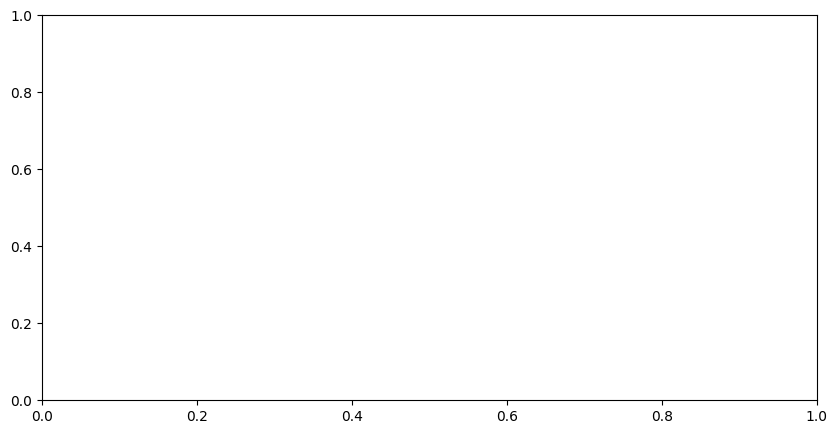

In [ ]:
import matplotlib.pyplot as plt

# Plot average_cost_elite
plt.figure(figsize=(10, 5))
plt.plot(all_datasets['iter'], all_datasets['average_cost_elite'])
plt.title('Average Cost Elite over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Average Cost Elite')
plt.show()

# Plot average_dist_elite
plt.figure(figsize=(10, 5))
plt.plot(all_datasets['iter'], all_datasets['average_dist_elite'])
plt.title('Average Distance Elite over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Average Distance Elite')
plt.show()


## Time analysis

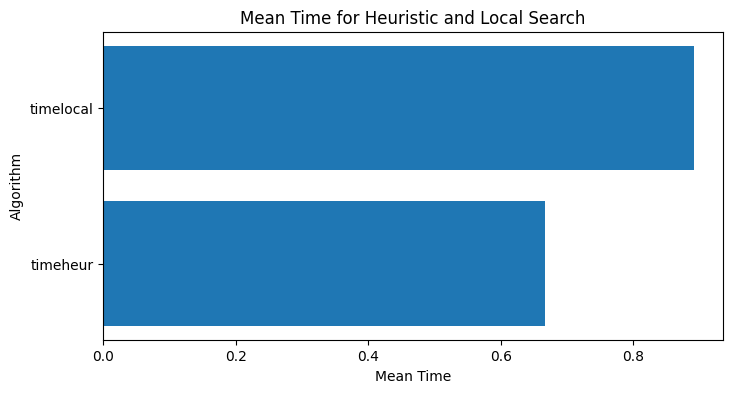

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate mean of timeheur and timelocal across all iterations
mean_timeheur = dataset['timeheur'].mean()
mean_timelocal = dataset['timelocal'].mean()

# plot horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(['timeheur', 'timelocal'], [mean_timeheur, mean_timelocal])
ax.set_xlabel('Mean Time')
ax.set_ylabel('Algorithm')
ax.set_title('Mean Time for Heuristic and Local Search')

plt.show()


### Main ideas from that already : 

- The reactive GRASP is not reactive at all, too much parameters and not enough simulations to update the probabilities.
- The penalty is really difficult to optimize for the greedy heuristic -> goal of the local search. Can we put more focus on that ?
- Regarding the when value, is it enough random ? If we remove some parameters how can implement the reactive GRASP ? Should it be reactive ? Should we for it to be more random ? 
- Add earliest
- Put hard constraint in CPLEX

Given the number of iterations -> difficult to make it reactive, better to have a fix parameters and optimize it. 